<a href="https://colab.research.google.com/github/Donald237/pyFortraCC/blob/main/examples/01_Introducing_Example/01_Introducing-pyFortraCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center"; span style="color:#336699"><b><h2>pyForTraCC - Introducing Example </h2></b></div>
<hr style="border:2px solid #0077b9;">
<br/>
<div style="text-align: center;font-size: 90%;">
   <sup><a href="https://www.linkedin.com/in/helvecio-leal/"> Helvécio B. Leal Neto, <i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><t>&nbsp;</t>
    <sup><a href="https://www.linkedin.com/in/alan-calheiros-64a252160/">Alan J. P. Calheiros<i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
   <br/><br/>
    National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:helvecio.neto@inpe.br">helvecio.neto@inpe.br</a>, <a href="mailto:alan.calheiros@inpe.br">alan.calheiros@inpe.br</a>
    <br/><br/>
    Last Update: Feb 12, 2025
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This notebook shows the steps for using the pyFortraCC to track objects present in a synthetic data set.
</div>    

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This notebook is part of the <a href="https://github.com/fortracc/pyfortracc">pyfortracc</a> examples gallery</b>
    <div style="margin-left: 10px; margin-right: 10px; margin-top:10px">
      <p> Leal Neto, H.B.; Calheiros, A.J.P.;  pyFortraCC Algorithm. São José dos Campos, INPE, 2024. <a href="https://github.com/fortracc-project/pyfortracc" target="_blank"> Online </a>. </p>
    </div>
</div>

### Schedule
 [1. Installation](#install)<br>
 [2. Input Data](#input)<br>
 [3. Read Function](#data)<br>
 [4. Parameters (Name_list)](#namelist)<br>
 [5. Tracking Routine](#track)<br>
 [6. Tracking Table](#tracktable)<br>
 [7. Tracking Visualization](#visualization)<br>

<a id='install'></a>
#### 1. Installation

Installing the pyFortraCC package can be done using the pip install command.

All dependencies will be installed in the current Python environment and the code will be ready to use.

In [1]:
# Install latest version of pyfortracc
!python -m pip install -q -U pyfortracc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.0 MB/s eta 0:00:00


After installation, if everything is correct, you can import the pyFortraCC package.

In [2]:
import pyfortracc
print('pyFortracc version', pyfortracc.__version__)

pyFortracc version 1.1.6rc0


To consult the documentation, you can use the command `help(pyfortracc)`

In [3]:
# pyfortracc package information
help(pyfortracc)

Help on package pyfortracc:

NAME
    pyfortracc

DESCRIPTION
    pyfortracc
    =====
    
    Provides
        1. Tracking Non-Rigid Clusters in 2D matrix
        2. Forecasting the movement of the Clusters by extrapolation
        3. Plot and analysis of the results of the tracking and forecasting
        4. Visualizing the results of the tracking, validation and forecasting
    
    How to use the package
    ----------------------------
    Documentation is available in two forms: docstrings provided
    with the code, and a reference guide, available from
    `the project homepage <https://pyfortracc.readthedocs.io/>`.
    
    
    Available modules
    ---------------------
    track
        Tracking Non-Rigid Clusters in 2D matrix
    forecast
        Forecasting the movement of the Clusters by extrapolation
    
    
    Available subpackages
    -----------------
    feature_extraction
        Extracting features from the input data
    spatial_operations
        Spatial ope

<a id='input'></a>
#### 2. Input Data

The dataset for this example is a synthetic set created to simulate the movement of cells in a 2D domain.<br>
And the values of each cell are reflectivity, equivalent to the radar reflectivity. All the data is stored in the netCDF format.
The code below downloads the data and saves it in the input folder.

In [4]:
import requests, zipfile, io, shutil

# Remove the input folder if it exists
shutil.rmtree('input', ignore_errors=True)

# Download the input files from Zenodo
url = 'https://zenodo.org/api/records/10624391/files-archive'
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('input')

<a id='data'></a>
#### 3. Read Function:

The read function is responsible for reading the data and returning the data in the format required by the pyFortraCC package.<br>
For this example, the data is in the netCDF format, and the read function receives the path to the file and returns 2D numpy array.

In [5]:
# Read_function data get a path and return a numpy array
import xarray as xr
def read_function(path):
	data = xr.open_dataarray(path).data
	return data

To verify the data, we can use the read function and check the values and the shape of the data.

In [6]:
import numpy as np
import glob

files = sorted(glob.glob('input/*.nc'))
sample_data = read_function(files[0])
print('Shape of the data:', sample_data.shape)
print('Data type:', sample_data.dtype)
print('Min:', np.nanmin(sample_data),'dBZ and', np.nanmax(sample_data), 'dBZ\n')
print('Example of the data:\n', sample_data)

Shape of the data: (241, 241)
Data type: float32
Min: 20.0 dBZ and 40.0 dBZ

Example of the data:
 [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


pyFortraCC have a multiple utility functions to help the user to visualize the data.
The function `plot_animation` is one of them. It receives the path where the data is stored showing the animation of the data.

In [7]:
pyfortracc.plot_animation(path_files='input/*.nc', read_function=read_function)

Generating animation... 

In [8]:
# Example Name list dictionary of mandatory parameters
name_list = {}
name_list['input_path'] = 'input/' # path to the input files
name_list['output_path'] = 'output/' # path to the output files
name_list['thresholds'] = [20,30,45] # python list of intensity thresholds to be used in the segmentation process
name_list['min_cluster_size'] = [10,5,3] # python thay list contains the minimum size of clusters
name_list['operator'] = '>=' # '>= - <=' or '=='
name_list['timestamp_pattern'] = '%Y%m%d_%H%M%S.nc' # timestamp file pattern
name_list['delta_time'] = 12 # in minutes

# Optional parameters, if not set, the algorithm will not use geospatial information
name_list['lon_min'] = -62.1475 # Min longitude of data in degrees
name_list['lon_max'] = -57.8461 # Max longitude of data in degrees
name_list['lat_min'] = -5.3048 # Min latitude of data in degrees
name_list['lat_max'] = -0.9912 # Max latitude of data in degrees

In [9]:
# If you want show all parameters
help(pyfortracc.default_parameters)

Help on function default_parameters in module pyfortracc.default_parameters:

default_parameters(name_lst=None, read_function=None)
    Default parameters for the pyfortracc module
    
    Parameters
    -------
    name_lst : dict
        Dictionary with the parameters to be used.
    read_function : function
        Function to read the data.
    mean_dbz: bool
        If True, the mean reflectivity is used to perform the tracking.
    cluster_method: str
        Method to perform the clustering. It can be 'dbscan' or 'ndimage'.
    eps: int
        Epsilon distance to be used in the clustering for the dbscan method.
    delta_tolerance: int
        Delta tolerance is the maximum time difference between two files.
    num_prev_skip: int
        Number of previous files to skip.
    edges: str
        Is the edge of the domain to be used. It can be 'left' or 'right'.
        It is used to perform the cluster linking in the edges of the domain.
    n_jobs: int
        Number of jobs t

<a id='track'></a>
#### 5. Track Routine

The tracking module groups the main objectives of the algorithm. This module uses the tracking parameters and the data reading function, and only with this information is it possible to carry out the entire tracking process of the objects present in the input data. The output of this module will be the tracking files, and they will be located in the trackingtable directory, which gives the name to the same entity that we will see in the next topic. Furthermore, it is worth highlighting that each step of the tracking module groups other modules (Features Extraction, Spatial Operations, Cluster linking and Result Containment) intended for the object tracking process.
You could also run all the functions in one line using the track function:

In [10]:
pyfortracc.track(name_list, read_function)

Features Extraction:


100%|█████████████████████████████████| 22/22 +                     [Elapsed:00:00 Remaining:<00:00]


Spatial Operations:


100%|█████████████████████████████████| 22/22 +                     [Elapsed:00:03 Remaining:<00:00]


Cluster linking:


100%|█████████████████████████████████| 22/22 +                     [Elapsed:00:01 Remaining:<00:00]


Concatenating:


100%|█████████████████████████████████| 22/22 +                     [Elapsed:00:00 Remaining:<00:00]


<a id='tracktable'></a>
#### 6. Tracking table

The tracking table is the generalized output entity of the algorithm, it is formed by the set of files (.parquet) that are located in the output directory of the same name ('output_path/trackingtable'). The information obtained in the tracking process is stored in a tabular format, and is organized according to the tracking time. Listed below are the names of the columns (output variables) and what they represent.

- Each row of tracking table is related to a cluster at its corresponding threshold level.
- The information spans from unique identifiers and descriptive statistics to geometric properties and temporal features.
- The Tracking table structure provides a comprehensive view of grouped entities, facilitating analysis and understanding of patterns across different threshold levels.

Tracking table columns:

*   **timestamp** (datetime64[us]): Temporal information of cluster.
*   **uid** (float64): Unique identifier of cluster.
*   **iuid** (float64): Internal Unique identifier of cluster.
*   **threshold_level** (int64): Level of threshold.
*   **threshold** (float64): Specific threshold.
*   **status** (object): Entity status (NEW, CONTINUOUS, SPLIT, MERGE, SPLIT/MERGE).
*   **u_, v_** (float64): Vector components.
*   **inside_clusters** (object): Number of inside clusters.
*   **size** (int64): Cluster size in pixels.
*   **min, mean, max, std** (float64): Descriptive statistics.
*   **delta_time** (timedelta64[us]): Temporal variation.
*   **file** (object): Associated file name.
*   **array_y, array_x** (object): Cluster array coordinates.
*   **vector_field** (object): Associated vector field.
*   **trajectory** (object): Cluster's trajectory.
*   **geometry** (object):  Boundary geometric representation of the cluster.
*   **lifetime** (int64): Cluster lifespan in minutes.
*   **duration** (int64): Cluster duration in minutes.
*   **genesis** (int64): Cluster genesis, with genesis: 1, active: 0, and death: -1.

Read the tracking table and concatenate the information in a single dataframe. For this, we will use glob and pandas libraries.

In [11]:
import pandas as pd
import glob

tracking_files = sorted(glob.glob(name_list['output_path'] + '/track/trackingtable/*.parquet'))
tracking_table = pd.concat(pd.read_parquet(f) for f in tracking_files)
display(tracking_table.head())

,timestamp,uid,iuid,threshold_level,threshold,status,size,lifetime,expansion,min,...,file,array_values,array_y,array_x,vector_field,trajectory,geometry,past_idx,merge_idx,split_pr_idx
cindex,,,,,,,,,,,,,,,,,,,,,
1,2014-02-12 10:00:00,1.0,NaN,0,20.0,NEW,371.0,12.0,NaN,20.0,...,input/20140212_100000.nc,"[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20....","[215, 215, 215, 216, 216, 216, 216, 216, 216, ...","[201, 202, 203, 199, 200, 201, 202, 203, 204, ...",LINESTRING EMPTY,LINESTRING EMPTY,POLYGON ((-58.56002531120332 -1.45656763485477...,NaN,None,NaN
2,2014-02-12 10:00:00,1.0,1.642,1,30.0,NEW,213.0,12.0,NaN,30.0,...,input/20140212_100000.nc,"[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[218, 218, 218, 218, 218, 218, 218, 218, 218, ...","[199, 200, 201, 202, 203, 204, 205, 206, 207, ...",LINESTRING EMPTY,LINESTRING EMPTY,POLYGON ((-58.59572157676349 -1.40287136929460...,NaN,None,NaN
3,2014-02-12 10:12:00,1.0,NaN,0,20.0,CON,371.0,24.0,0.0,20.0,...,input/20140212_101200.nc,"[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20....","[204, 204, 204, 205, 205, 205, 205, 205, 205, ...","[190, 191, 192, 188, 189, 190, 191, 192, 193, ...",LINESTRING EMPTY,LINESTRING (-58.50025090425115 -1.268920173133...,POLYGON ((-58.75635477178423 -1.65345394190871...,0.0,None,NaN
4,2014-02-12 10:12:00,1.0,1.965,1,30.0,NEW,213.0,12.0,NaN,30.0,...,input/20140212_101200.nc,"[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30....","[207, 207, 207, 207, 207, 207, 207, 207, 207, ...","[188, 189, 190, 191, 192, 193, 194, 195, 196, ...",LINESTRING EMPTY,LINESTRING EMPTY,POLYGON ((-58.7920510373444 -1.599757676348548...,NaN,None,NaN
5,2014-02-12 10:24:00,1.0,NaN,0,20.0,CON,371.0,36.0,0.0,20.0,...,input/20140212_102400.nc,"[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20....","[194, 194, 194, 195, 195, 195, 195, 195, 195, ...","[180, 181, 182, 178, 179, 180, 181, 182, 183, ...",LINESTRING EMPTY,LINESTRING (-58.50025090425115 -1.268920173133...,POLYGON ((-58.93483609958506 -1.83244149377593...,0.0,None,NaN


If you want convert the tracking table to a csv file, you can use directly convertion of dataframe to csv file.

In [12]:
tracking_table.to_csv('tracking_table.csv')

<a id='visualization'></a>
#### 7. Track Visualization

To check the tracking results visually, the algorithm has a visualization module that allows you to check the tracking results based on the data in the tracking table.

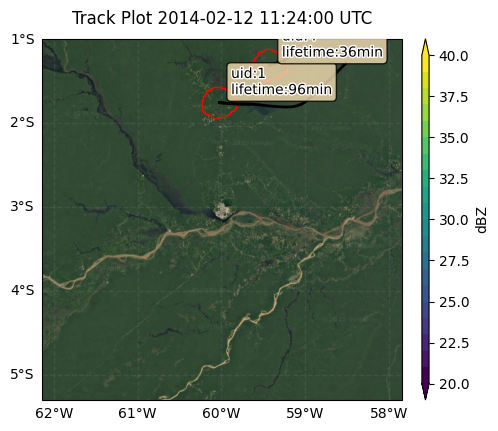

In [13]:
# Visualize the tracking at a specific timestamp
pyfortracc.plot(timestamp='2014-02-12 11:24:00',
                name_list=name_list,
                read_function=read_function,
                cbar_title='dBZ',
                info_cols=['uid','lifetime'],
                background='satellite')

In [17]:
# Visualize as animation. (obs: the animation could be fail sometimes, run again to fix)
pyfortracc.plot_animation(read_function= read_function,
                          name_list= name_list,
                          cbar_title= 'dBZ',
                          threshold_list= [20],
                          info_cols=['uid','lifetime','status'],
                          start_timestamp= '2014-02-12 10:00:00',
                          end_timestamp ='2014-02-12 16:12:00',
                          parallel= False)

Generating animation... 